In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score




In [19]:
AmesHstData = pd.read_csv('AmesHousing.csv')
print(AmesHstData.head())
print("\n")
print(AmesHstData.info())
print("\n")
print(AmesHstData.shape)
print("\n")
print("Data Shape:", AmesHstData.shape)
print("\nData Types:\n", AmesHstData.dtypes)
print("\nMissing Values:\n", AmesHstData.isnull().sum())
print("\nSummary Statistics Of Data:\n", AmesHstData.describe(include='all'))

   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0       

In [20]:
DuplicateRowsum = AmesHstData.duplicated().sum()
print("Number of duplicated rows: ",DuplicateRowsum )
print("The Duplicated Rows are: \n", AmesHstData[AmesHstData.duplicated()])
print("\n")
database_withDuplicatedRowsGone = AmesHstData.drop_duplicates()
print("The Database Without the Duplicaed Rows Here \n ", database_withDuplicatedRowsGone.head())
print("\n")

Number of duplicated rows:  0
The Duplicated Rows are: 
 Empty DataFrame
Columns: [Order, PID, MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Alley, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen

In [21]:
Partial_Duplicates_Rows_Count = AmesHstData.duplicated(keep=False).sum()
print("The No of Partial Duplicates Rows are: ", Partial_Duplicates_Rows_Count)
print("\n")
AmesHstData_no_partial_duplicates = AmesHstData.drop_duplicates(keep='first')
print(AmesHstData_no_partial_duplicates.head())


The No of Partial Duplicates Rows are:  0


   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sal

In [22]:
print("Missing Values in each Column: \n", AmesHstData.isnull().sum())
print("\n")
print("Percentage of Missing Values in each Column: \n", (AmesHstData.isnull().mean()*100))

Missing_Values_Coloums_Dataframe = pd.DataFrame({
    'Missing_Values_Coloums': AmesHstData.isnull().any(),
    'Missing_Values_Count': AmesHstData.isnull().sum(),
    'Missing_ValuesIn_Percentage': (AmesHstData.isnull().sum() / len(AmesHstData)) * 100
})

print(Missing_Values_Coloums_Dataframe)

Missing Values in each Column: 
 Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64


Percentage of Missing Values in each Column: 
 Order              0.000000
PID                0.000000
MS SubClass        0.000000
MS Zoning          0.000000
Lot Frontage      16.723549
                    ...    
Mo Sold            0.000000
Yr Sold            0.000000
Sale Type          0.000000
Sale Condition     0.000000
SalePrice          0.000000
Length: 82, dtype: float64
                Missing_Values_Coloums  Missing_Values_Count  \
Order                            False                     0   
PID                              False                     0   
MS SubClass                      False                     0   
MS Zoning                        False                     0

In [23]:
def Imputation_Of_Values(database):
    for column in database.columns:
        if np.issubdtype(database[column].dtype, np.number):
            median_value = database[column].median()
            database[column] = database[column].fillna(median_value)
            print(f"Filled NaN in numeric column '{column}' with Median = {median_value}")
        
        elif database[column].dtype == 'object':
            mode_value = database[column].mode()[0]
            database[column] = database[column].fillna(mode_value)
            print(f"Filled NaN in categorical column '{column}' with Mode = {mode_value}")
        
        elif np.issubdtype(database[column].dtype, np.datetime64):
            database[column] = database[column].interpolate(method='time')
            print(f"Interpolated missing datetime values in '{column}'")
    
    return database

Database_After_Imputation = Imputation_Of_Values(AmesHstData)
print("The Database After Imputation of Missing Values is : \n", Database_After_Imputation.head())

Filled NaN in numeric column 'Order' with Median = 1465.5
Filled NaN in numeric column 'PID' with Median = 535453620.0
Filled NaN in numeric column 'MS SubClass' with Median = 50.0
Filled NaN in categorical column 'MS Zoning' with Mode = RL
Filled NaN in numeric column 'Lot Frontage' with Median = 68.0
Filled NaN in numeric column 'Lot Area' with Median = 9436.5
Filled NaN in categorical column 'Street' with Mode = Pave
Filled NaN in categorical column 'Alley' with Mode = Grvl
Filled NaN in categorical column 'Lot Shape' with Mode = Reg
Filled NaN in categorical column 'Land Contour' with Mode = Lvl
Filled NaN in categorical column 'Utilities' with Mode = AllPub
Filled NaN in categorical column 'Lot Config' with Mode = Inside
Filled NaN in categorical column 'Land Slope' with Mode = Gtl
Filled NaN in categorical column 'Neighborhood' with Mode = NAmes
Filled NaN in categorical column 'Condition 1' with Mode = Norm
Filled NaN in categorical column 'Condition 2' with Mode = Norm
Filled N


Descriptive Statistics:
             Order           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2930.00000  2.930000e+03  2930.000000   2930.000000    2930.000000   
mean   1465.50000  7.144645e+08    57.387372     69.019795   10147.921843   
std     845.96247  1.887308e+08    42.638025     21.326422    7880.017759   
min       1.00000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     733.25000  5.284770e+08    20.000000     60.000000    7440.250000   
50%    1465.50000  5.354536e+08    50.000000     68.000000    9436.500000   
75%    2197.75000  9.071811e+08    70.000000     78.000000   11555.250000   
max    2930.00000  1.007100e+09   190.000000    313.000000  215245.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2930.000000   2930.000000  2930.000000     2930.000000   2930.000000   
mean       6.094881      5.563140  1971.356314     1984.266553    101.096928   
std        1.411026      1.111537    30.

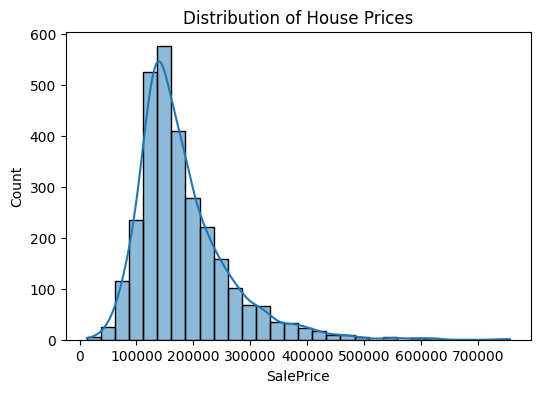

In [24]:
print("\nDescriptive Statistics:\n", Database_After_Imputation.describe())
plt.figure(figsize=(6,4))
sns.histplot(Database_After_Imputation["SalePrice"], bins=30, kde=True)
plt.title("Distribution of House Prices")
plt.show()


Visualizing Outliers with Boxplots for Key Numeric Features...



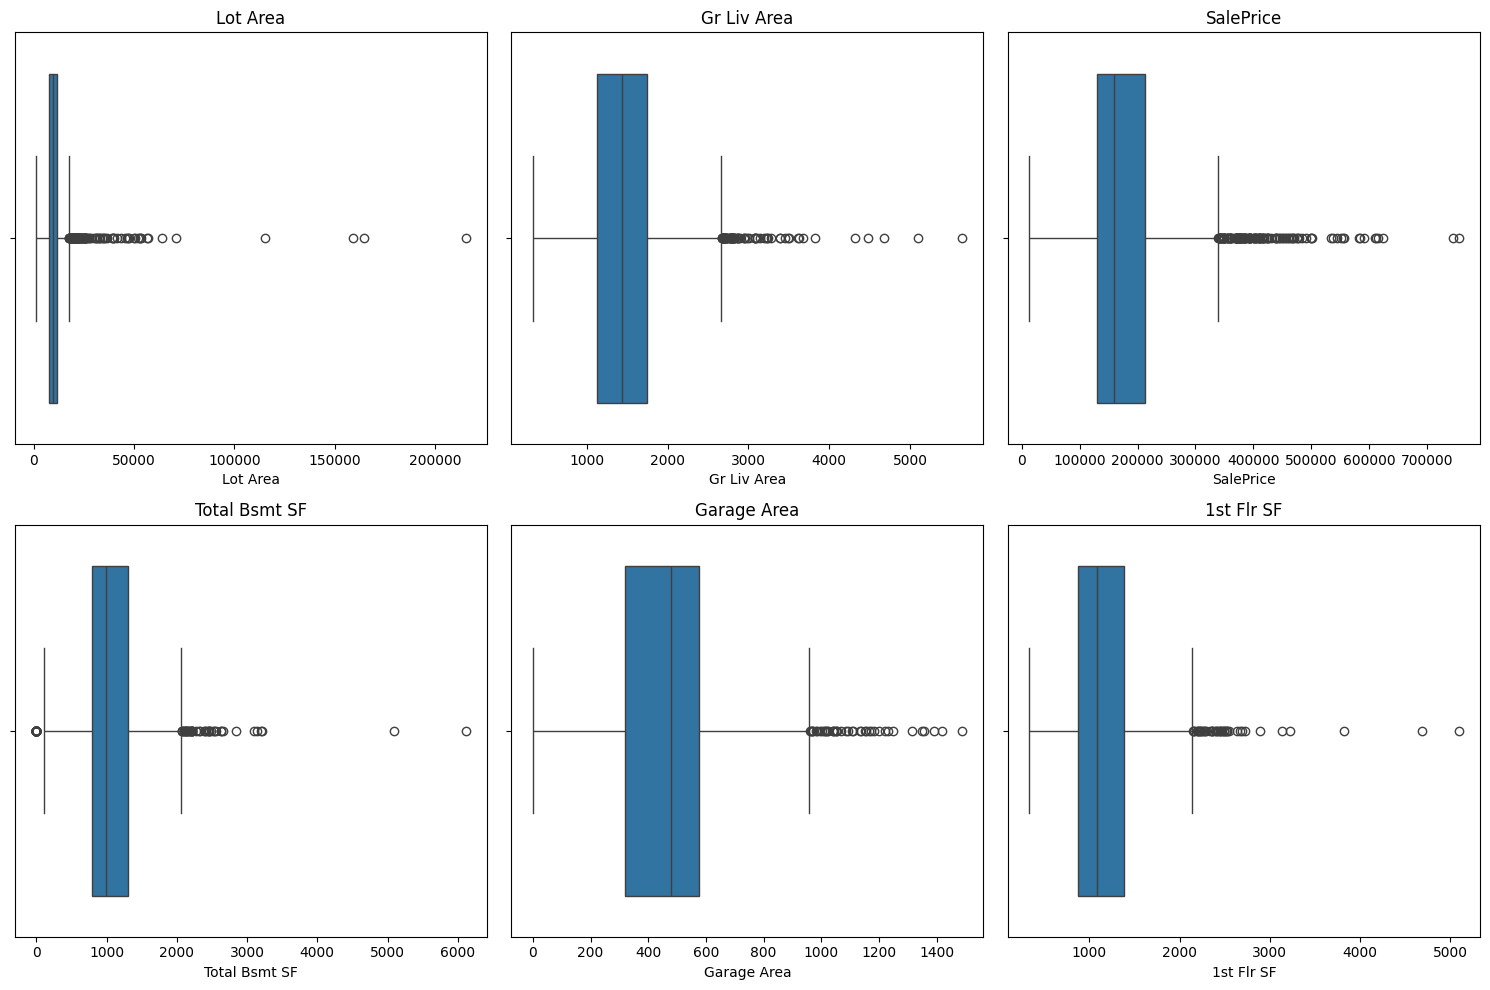

In [25]:

print("\nVisualizing Outliers with Boxplots for Key Numeric Features...\n")
ColsReferds = Database_After_Imputation.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15,10))
for i, col in enumerate(["Lot Area", "Gr Liv Area", "SalePrice", "Total Bsmt SF", "Garage Area", "1st Flr SF"]):
    if col in Database_After_Imputation.columns:
        plt.subplot(2,3,i+1)
        sns.boxplot(x=Database_After_Imputation[col])
        plt.title(f"{col}")
plt.tight_layout()
plt.show()


In [26]:

X = Database_After_Imputation.drop("SalePrice", axis=1)
y = Database_After_Imputation["SalePrice"]


X = X.drop(["Order", "PID"], axis=1, errors="ignore")


NumResps = X.select_dtypes(include=["int64", "float64"]).columns
StrResps = X.select_dtypes(include=["object"]).columns

print(f"\nNumeric Columns: {len(NumResps)}")
print(f"Categorical Columns: {len(StrResps)}")


Numeric Columns: 36
Categorical Columns: 43


In [27]:


NumResps_Trans = StandardScaler()
StrResps_Trans = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', NumResps_Trans, NumResps),
        ('cat', StrResps_Trans, StrResps)
    ])


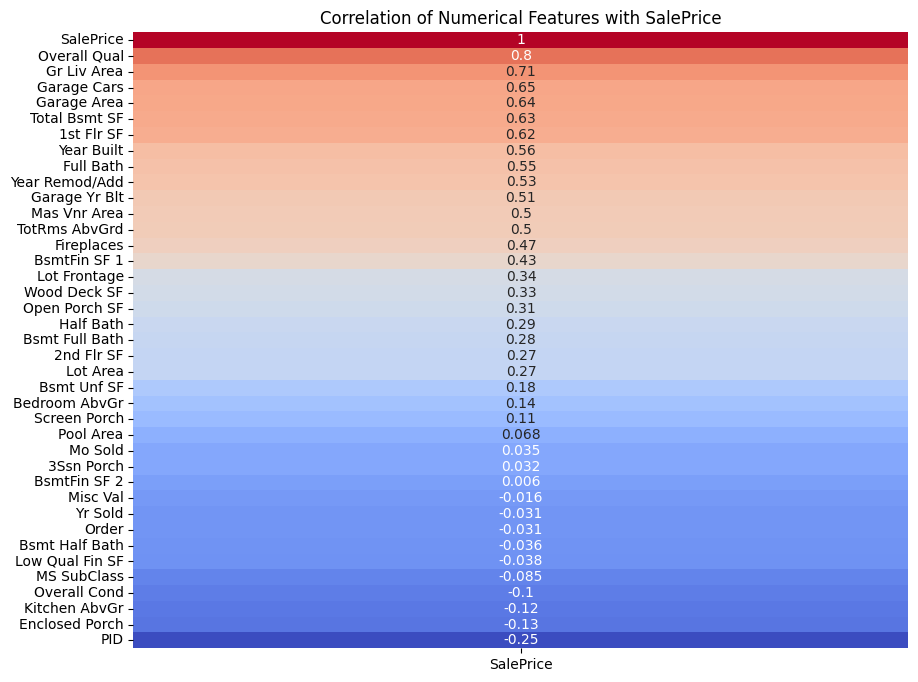

<Figure size 800x1200 with 0 Axes>

<Figure size 800x1200 with 0 Axes>

In [28]:


plt.figure(figsize=(10,8))
corr = Database_After_Imputation.select_dtypes(include=['number']).corr()
sns.heatmap(corr[['SalePrice']].sort_values(by='SalePrice', ascending=False),
            annot=True, cmap='coolwarm', cbar=False)
plt.title("Correlation of Numerical Features with SalePrice")
plt.show()
plt.figure(figsize=(8,12))



In [29]:


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("\nTrain shape:", X_train.shape, " | Test shape:", X_test.shape)


Train shape: (2344, 79)  | Test shape: (586, 79)


In [30]:


AmesMdls = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
AmesMdls.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Ba...
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'Sale Condition'],
      dtype='object'))])),
                ('regressor', LinearRegression())])


Model Evaluation Results:
Root Mean Square Error (RMSE): 29613.76
R² Score: 0.8906


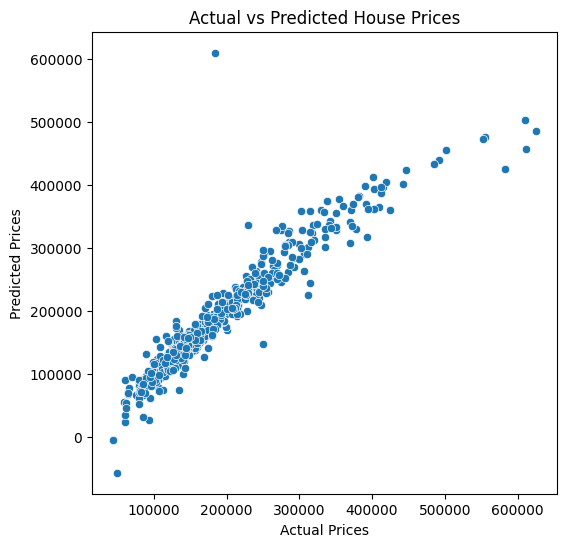

In [31]:


Predsts = AmesMdls.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, Predsts))
r2 = r2_score(y_test, Predsts)

print("\nModel Evaluation Results:")
print(f"Root Mean Square Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

# Actual vs Predicted Plot
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=Predsts)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


In [32]:

Numfeatures = NumResps  
Strfeatures = StrResps  

encoded_cat_features = list(
    AmesMdls.named_steps['preprocessor']
    .transformers_[1][1]
    .get_feature_names_out(Strfeatures)
)


EncdFelist = list(Numfeatures) + encoded_cat_features

Coeffs = AmesMdls.named_steps['regressor'].coef_

FetsDatfs = pd.DataFrame({
    'Feature': EncdFelist,
    'Coefficient': Coeffs
}).sort_values(by='Coefficient', ascending=False)

print("\nTop Positive Predictors:")
print(FetsDatfs.head(10))

print("\nTop Negative Predictors:")
print(FetsDatfs.tail(10))



Top Positive Predictors:
                  Feature    Coefficient
282     Misc Feature_Othr  151346.314254
8            BsmtFin SF 1  143356.222444
281     Misc Feature_Gar2  129017.141233
10            Bsmt Unf SF  128680.347141
283     Misc Feature_Shed  128231.883666
132     Roof Matl_Membran  125636.335703
137     Roof Matl_WdShngl  109949.965253
133       Roof Matl_Metal  107844.986992
76   Neighborhood_GrnHill  103006.158309
272            Pool QC_Ex   66183.838267

Top Negative Predictors:
                 Feature    Coefficient
165   Exterior 2nd_Stone  -27637.361219
273           Pool QC_Fa  -29190.637754
274           Pool QC_Gd  -32103.450792
108     Condition 2_RRAe  -35173.479017
264       Garage Cond_Ex  -49222.125135
172  Mas Vnr Type_CBlock  -62220.812233
242       Functional_Sal  -84936.348093
11         Total Bsmt SF -120724.542461
280    Misc Feature_Elev -408595.339153
130    Roof Matl_ClyTile -579594.279437
